## Import some useful libraries

In [1]:
# import number crunching libraries
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex

# import plotting libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

#don't truncate results
pd.set_option('display.max_rows', None)


## Load the data


In [2]:
df = pd.read_csv('responses_complete.csv', index_col=None, parse_dates=['date'])


## Compile a list of questions and answer options

In [3]:
# a dictionary of columns that contain comma-separated multiple answer options
multiple_answer_options = {
    'schools': ['CET', 'PVC', 'CHHS', 'Homeschooled'],
    'child_drive_reason': ['No - we do not drive, or prefer not to drive', 'Our own personal preference', 'Lack of available busing where we live', 'The bus schedule does not match our schedule', 'Safety concerns with buses', 'Safety concerns with walking', 'Safety concerns with bicycling', "My child's health condition"],
    'child_no_walk_reason': ['No - they walk a lot', 'My child does not like to walk', 'We live too far to walk', "We don't have time to walk", 'Fear of dangerous driving', 'Lack of adequate sidewalks', 'Lack of adequate crosswalks at busy intersections', 'Lack of crossing guards at busy intersections', "My child's health condition", 'Visually unappealing route'],
    'child_no_bike_reason': ['No - they bicycle a lot', 'My child does not like to bicycle', 'My child is too young to bicycle', 'We live too far to bicycle', 'Our own personal preference', 'Fear of dangerous driving', 'Lack of adequate bike lanes', "My child's health condition", 'Visually unappealing route', 'Hills'],
    'no_walk_reason': ['No - I walk a lot', 'I live too far to walk', 'I do not like to walk', "I don't have time to walk", 'Fear of dangerous driving', 'Lack of adequate sidewalks', 'Lack of adequate crosswalks at intersections', 'Lack of crossing guards at intersections', "My health condition", 'My own personal preference', 'Visually unappealing'], 
    'no_bike_reason': ['No - I bicycle a lot', 'I live too far to bicycle', 'I do not like to bicycle', "I don't have time to bicycle", 'Fear of dangerous driving', 'Lack of adequate bike lanes', 'My health condition', 'My own personal preference', 'Visually unappealing'],
    'drive_reason': ['No - I do not drive, or prefer not to drive', "I don't have time to walk or bicycle", 'Safety concerns with walking', 'Safety concerns with bicycling', 'My own health condition', 'My own personal preference'],
    'commuter_distance': ['Within Croton', 'Within Westchester', 'To/from New York City'],
}

# remember that there was also an 'other' field where users could enter custom answers... we'll deal with that later.


In [4]:
#add the most popular complaint tags to the dictionary of questions and their answer options
multiple_answer_options['problem_tags'] = [ 'speeding', 'missing sidewalks', 'cpa', 'sidewalk condition', 'aggressive driving', 'driver awareness', 's riverside', '129', 'maple', 'cyclists breaking rules', 'cleveland', 'road surface', 'municipal place', 'missing crosswalks', 'bushes on sidewalk', 'grand', 'narrow roads', 'mt airy', 'shoprite', 'benedict', 'five corners', 'van wyck', 'dummy light', 'crossing guard', 'gottwald circle', 'n riverside', 'poor lighting', 'croton commons', 'truesdale', 'hmb trail', 'cet', 'on-street parking', 'old post n', 'olcott', 'old post s', 'morningside' ]

#add the most popular suggestion tags to the dictionary of questions and their answer options
multiple_answer_options['suggestion_tags'] = [ 'bike lanes', 'more sidewalks', 'enforce speed', 'maintain sidewalks', 'reduce speed', 'educate cyclists', 'more crosswalks', 'speed bumps', 'no bike lanes', 'maintain crosswalks', 'enforce crosswalks', 'sidewalk on mt airy s', 'reduce on-street parking', 'more traffic lights', 'better lighting', 'more stop signs', 'dedicated pedestrian walk signals', 'more signs', 'improve route 9 access', 'educate pedestrians', 'outlaw cycling', 'enforce trimming of bushes', 'speed cameras', 'parking on one side only', 'bike racks', 'traffic calming', 'speed indicator signs' ]


## Response counts to each multiple select question

## schools:

,number,percent
response,,
CET,104,40%
PVC,78,30%
CHHS,70,27%
Homeschooled,5,2%


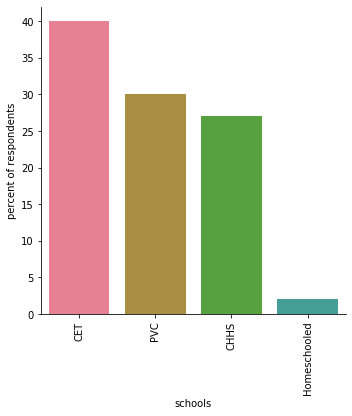

#### other responses:

Circle School                                     3
St. Augustine                                     2
Happy Hearts                                      2
Happy Hearts on the Hudson                        1
Circle                                            1
Circle school                                     1
Nursery. Must drive them                          1
Happy hearts                                      1
Briarcliff nursery school                         1
Childrenspace                                     1
The Harvey School                                 1
Asbury - preschool (will attend CET next year)    1
Happy Hearts Day Care                             1
Manitou                                           1
Circle School/Asbury Play & Learn                 1
Hen Hud Schools                                   1
College                                           1
SUNY purchase                                     1
Windward and Hackley                              1
Masters     

## child_drive_reason:

,number,percent
response,,
The bus schedule does not match our schedule,35,16%
Safety concerns with walking,24,11%
Safety concerns with bicycling,17,8%
Lack of available busing where we live,7,3%
Safety concerns with buses,5,2%
My child's health condition,3,1%


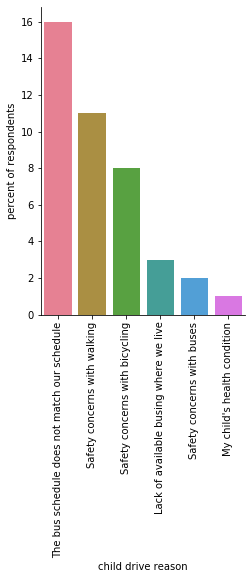

#### other responses:

Kids running late                                                                                                        2
Bad weather                                                                                                              2
Weather                                                                                                                  2
Drive to nursery. Bus to CET                                                                                             1
Employed near school                                                                                                     1
Need to carry large stuff to school                                                                                      1
Sometimes kids wake up too late for the bus                                                                              1
Nursery school                                                                                                           1
With limited tim

## child_no_walk_reason:

,number,percent
response,,
We don't have time to walk,38,14%
Lack of adequate sidewalks,37,14%
Fear of dangerous driving,37,14%
Lack of adequate crosswalks at busy intersections,22,8%
My child does not like to walk,11,4%
Lack of crossing guards at busy intersections,9,3%
My child's health condition,2,1%
Visually unappealing route,1,0%


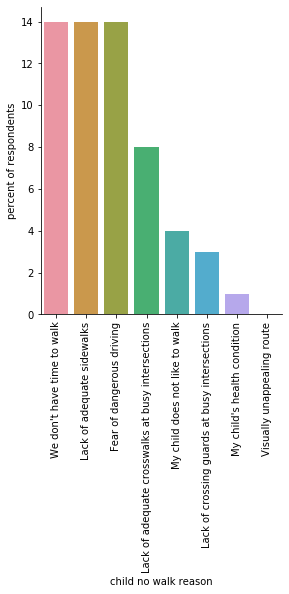

#### other responses:

Too young                                                                                                                                                                                         5
He is just entering the grade you can walk to school this year so we don't know if we will allow him to walk more or walk with him. He does enjoy biking to school with a parent occasionally.    1
One walks and the other takes the bus                                                                                                                                                             1
Walking to Town on Mt. Airy Road is a Death-Wish because it is too narrow and has no shoulders.                                                                                                   1
My child is too young. Having said that                                                                                                                                                           1
On the far side     

## child_no_bike_reason:

,number,percent
response,,
Fear of dangerous driving,66,24%
Lack of adequate bike lanes,46,16%
Hills,29,10%
We live too far to bicycle,27,10%
My child does not like to bicycle,27,10%
My child's health condition,3,1%
Visually unappealing route,2,1%


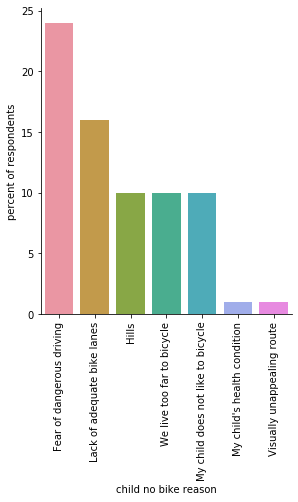

#### other responses:

Too young                                                                                                3
First year we are considering it is this year for pvc                                                    1
My child is too young to bicycle yet.                                                                    1
No side walks. South Mt Airy people go 45+ miles and hour                                                1
She biked or skootered a lot when we lived in the village.  Now too far and dangerous from W Mt Airy.    1
We're overly-concerned parents :)                                                                        1
My child is to young to bike                                                                             1
It’s really hilly and better to walk!                                                                    1
Easier to walk than bike                                                                                 1
She still rides on the side walk     

## no_walk_reason:

,number,percent
response,,
Lack of adequate sidewalks,113,16%
I don't have time to walk,87,13%
Fear of dangerous driving,56,8%
Lack of adequate crosswalks at intersections,46,7%
My health condition,27,4%
Visually unappealing,19,3%
I do not like to walk,9,1%
Lack of crossing guards at intersections,6,1%


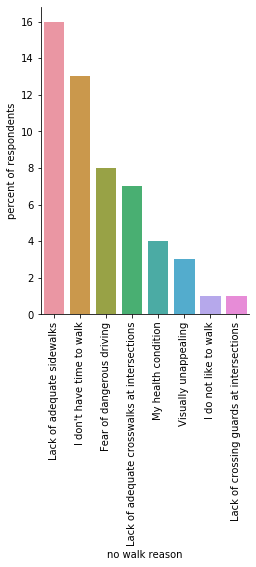

#### other responses:

Hills                                                                                                                   3
Drivers not adhering to crosswalk regulations                                                                           1
No- I’m just lazier than I’d like                                                                                       1
I walk on the Croton Aquaduct                                                                                           1
Ilillegal behaviour by drivers and other pedestrians                                                                    1
I belong to a Club where I regularly exercise.                                                                          1
I swim laps for exercise and garden.                                                                                    1
The winter                                                                                                              1
Other than for exercise 

## no_bike_reason:

,number,percent
response,,
Fear of dangerous driving,126,21%
Lack of adequate bike lanes,124,21%
I do not like to bicycle,84,14%
I don't have time to bicycle,64,11%
My health condition,26,4%
I live too far to bicycle,20,3%
Visually unappealing,6,1%


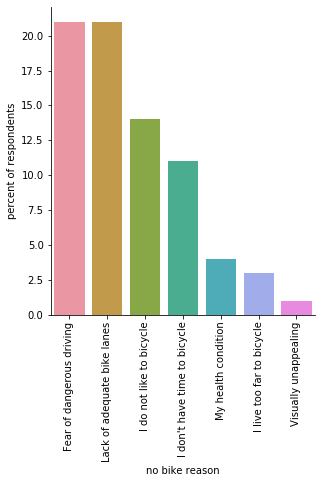

#### other responses:

Hills                                                                                                                                      4
Fear of dangerous drivers                                                                                                                  3
I currently don’t own a bicycle                                                                                                            2
Don’t know how                                                                                                                             2
Never learned                                                                                                                              1
Worried about train station security and safety riding in traffic                                                                          1
Don't know how to ride a bike.                                                                                                             1
Timing I am i

## drive_reason:

,number,percent
response,,
I don't have time to walk or bicycle,134,25%
Safety concerns with bicycling,95,18%
Safety concerns with walking,60,11%
My own health condition,28,5%


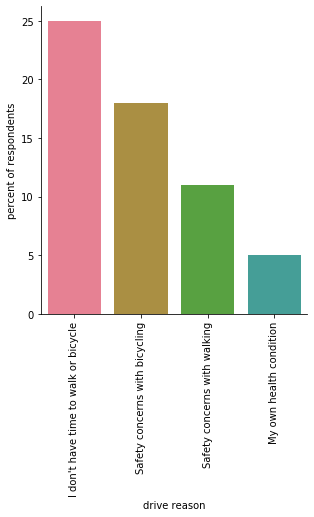

#### other responses:

Hills                                                                                                                        6
Time                                                                                                                         5
time                                                                                                                         3
Too far                                                                                                                      3
Convenience                                                                                                                  3
Distance from my airy                                                                                                        2
Going somewhere too far to walk                                                                                              1
I don't want to carry groceries home by walking 1.5 miles                                                      

## commuter_distance:

,number,percent
response,,
To/from New York City,185,61%
Within Westchester,89,29%
Within Croton,29,10%


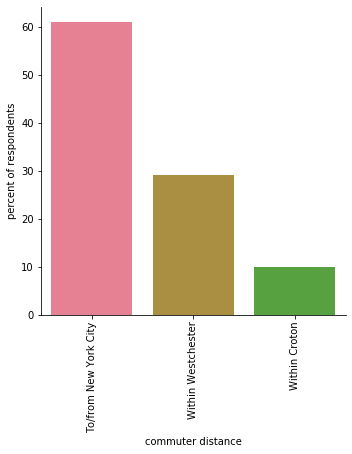

#### other responses:

To/From New York City                 5
Dutchess County                       2
to northern NJ                        1
West Point                            1
Greenwich                             1
35 minutes northwest                  1
Bronx                                 1
NJ                                    1
Northern Westchester                  1
Ct                                    1
Across river                          1
To NY city and with in Westchester    1
To/from Old Greenwich                 1
Drive New Jersey                      1
Long Island                           1
Varies widely                         1
Orange county                         1
Both nyc and westChester              1
To/from Hoboken NJ                    1
to Connecticut                        1
Name: commuter_distance_other, dtype: int64

## problem_tags:

,number,percent
response,,
speeding,125,9%
missing sidewalks,122,9%
cpa,87,6%
sidewalk condition,83,6%
aggressive driving,75,6%
driver awareness,74,6%
s riverside,70,5%
129,52,4%
maple,48,4%


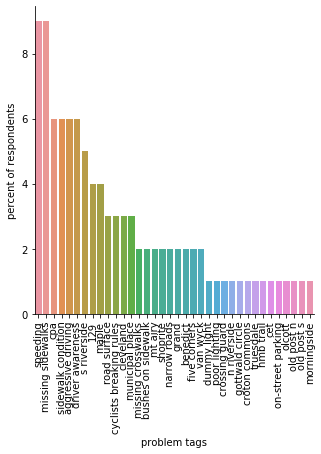

#### other responses:

crosswalk condition           6
radnor                        6
bungalow                      6
albany post road              5
upper village                 5
pvc                           4
side-by-side cyclists         4
pedestrians in roads          4
library                       4
nordica                       4
station lot                   4
parking on sidewalk           4
gerstein                      3
illegal parking               3
narrow streets                3
cyclists at croton landing    3
dpw                           3
wells                         2
jacoby                        2
cvs                           2
Name: problem_tags_other, dtype: int64

## suggestion_tags:

,number,percent
response,,
bike lanes,104,15%
more sidewalks,98,15%
enforce speed,66,10%
maintain sidewalks,64,9%
reduce speed,46,7%
educate cyclists,39,6%
more crosswalks,38,6%
speed bumps,24,4%
no bike lanes,17,3%


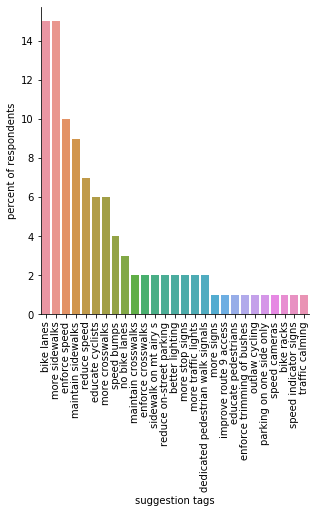

#### other responses:

lower speed limit                                      4
no parking next to corners                             3
lower speed limits                                     3
dedicated bicycle trails                               3
sharrows                                               3
clearer signs                                          3
stop signs on lexington near sunset park               2
raise speed limits                                     2
traffic light on cpa                                   2
reduce num cars                                        2
lower taxes                                            2
outlaw walking in road                                 2
stop signs on benedict                                 2
require cyclists wear reflective apparel and lights    2
more parking                                           2
reopen hmb river trail                                 2
wider roads                                            2
5 way stop on mt airy s        

In [5]:
# loop through each question
for question in multiple_answer_options.keys():    
    display(Markdown('## {}:'.format(question)))

    # calculate both absolute numbers and percentages for each answer option
    df_abs = df.filter(regex=("^{}_.*".format(question))).sum().sort_values(ascending=False).to_frame()
    df_per = df_abs.apply(lambda x: 100 * x / x.sum()).round(0).astype(int).sort_values(by=0,ascending=False).astype(str) + '%'
    
    # merge both absolute numbers and percentages together into one DataFrame
    df_both = pd.merge(df_abs, df_per, right_index=True, left_index=True)

    # prettify the row indices
    df_both = df_both.reset_index()
    df_both['index'] = df_both['index'].str.replace("{}_".format(question), '')
    df_both = df_both.rename(columns={'0_x': 'number', '0_y': 'percent', 'index': 'response'})
    df_both.set_index('response', inplace=True)
    
    # remove some useless data
    useless_responses = [
        'No - we do not drive or prefer not to drive',
        'Our own personal preference',
        'No - they walk a lot',
        'No - I walk a lot',
        'I live too far to walk',
        'My child is too young to bicycle',
        'My own personal preference',
        'No - I bicycle a lot',
        'No - they bicycle a lot',
        'No - I do not drive or prefer not to drive',
        'We live too far to walk']
    for response in useless_responses:
        try:
            df_both = df_both.drop(response)
        except:
            pass
    
    # show the data
    display(df_both)

    # remove percent signs next to the data
    data = df_both
    for col in data:
        # remove percent sign, if present so we can do math on it
        try:
            data[col] = data[col].str.replace('%', '').astype(float).round(0).astype(int) # get rid of percent signs
        except:
            pass

    # plot the data
    sns.set_palette("husl") #deep, muted, pastel, bright, dark, or colorblind
    data = data['percent'].reset_index()
    data.columns = [question.replace('_', ' '), 'percent of respondents']
    g = sns.catplot(x=question.replace('_', ' '), y="percent of respondents", kind="bar", data=data);
    g.set_xticklabels(rotation=90)
    plt.show()
    
    # show a few 'other' answers
    display(Markdown('#### other responses:'))
    s_others = df['{}_other'.format(question)]
    display(s_others.value_counts()[:20])
